# Numerical solution of the Kuramoto-Sivashinsky Equation using Fourier spectral methods

Equations are taken from this paper: https://engineeringresearch.org/index.php/GJRE/article/view/1140/1072

In [1]:
using DifferentialEquations,FFTW,Plots, LSODA

In [2]:
N = 64
L = 2π
k = ifftshift(range(-N÷2,N÷2-1,N))
k2 = @. k^2
k4 = @. k^4
x = 0:2*L/(N-1):2*L;

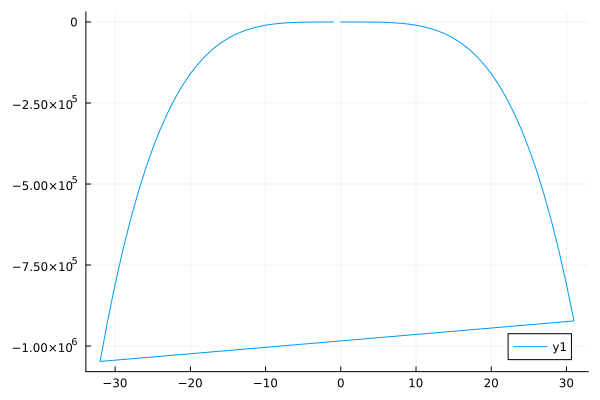

In [3]:
plot(k,k2-k4)

In [4]:
function Kuramoto!(du, u, p, t)
    N, L = p
    u_   = fft(u)
    u_2  = fft(u.^2)
    duk = @. (k2 - k4)*u_-im*k/2*u_2
    du .= real.(ifft(duk))
end

Kuramoto! (generic function with 1 method)

In [37]:
u0 = exp.(cos.(x./2))
p = [N,L]
tspan = (0.0, 60);

In [38]:
prob = ODEProblem(Kuramoto!, u0, tspan, p);

In [46]:
sol = solve(prob,lsoda(),dt=2e-10,saveat=5e-1);

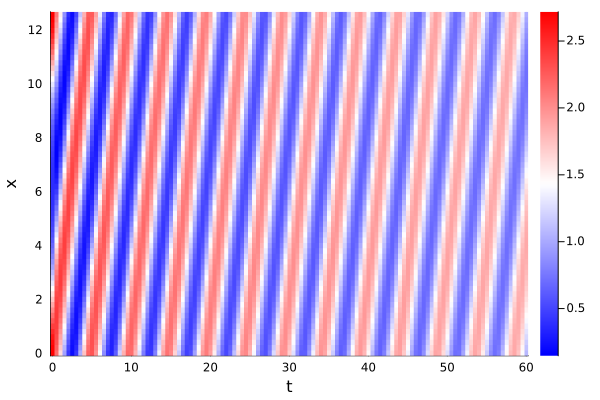

In [47]:
u = hcat(real.(sol.u)...)
heatmap(sol.t,x,u,c=:bwr,xlabel="t",ylabel="x")

In [51]:
plot(x,ones(N).*sol.t[1],sol.u[1],zlim=(-1,4), legend = false, colorbar=true,line_z = sol.u[1],color=:gist_rainbow,dpi=300,size=(1000,1000))
for i in 1:length(sol.t)
    plot!(x,ones(N).*sol.t[i],sol.u[i], legend = false, colorbar=true, line_z = sol.u[i],color=:gist_rainbow,dpi=300,size=(1000,1000))
end
savefig("myplot.png") 

"/home/nadorij/Elementary_chaos_theory/myplot.png"